In [1]:
# 製作近30天的日期
from datetime import timedelta
from datetime import datetime

ago_list=[]
how_days=30

today=datetime.now()
print('今天-1日期:',today)
ago_30=today-timedelta(days=how_days)
print('30天前日期:',ago_30)

# 印出時間字串 range可以控制日期範圍
for t in range(0,int(how_days)-1):    
    ago_days=ago_30+timedelta(t)  # 從30天前一天一天累加至今天
    ago_days=datetime.strftime(ago_days,'%Y-%m-%d')   # 將時間格式轉成字串
    ago_list.append(ago_days)
print(ago_list)

今天-1日期: 2022-04-25 18:02:08.971346
30天前日期: 2022-03-26 18:02:08.971346
['2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23']


In [2]:
# 爬取北中南東台灣分類縣市 轉換成需要的樣子 練習簡單處理字串
import bs4,requests

url='https://www.ndc.gov.tw/nc_77_4402'
headers={'user-agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}
response=requests.get(url,headers=headers)
obj_soup=bs4.BeautifulSoup(response.text,'lxml')

c_list_1,c_list_2,citys_list,citys_dict=[],[],[],[]
change_list=['、','及','與']  # 印出網頁內容後得知的內容 把這些字串轉成可以分隔用的符號*
remove_list=['\r\n\t','。','包括']  # 把不要的字串變空值

get_citys=obj_soup.find('div','introduce').find_all('li')[-1]
for city in get_citys:
    # 如果內容是bs4.element.NavigableString型態的話 表示不是標籤
    if type(city)==bs4.element.NavigableString:
        for r in remove_list:
            city=city.replace(r,'')
        for c in change_list:
            city=city.replace(c,'*')
        city=city.replace('臺','台')
        city=city.replace('部區域','台灣')
        c_list_1.append(city)
    else:
        print()
        #print(type(city),'是標籤所以不取')
#print(c_list_1)

for citys in c_list_1:
    this_areas=citys.split('：')[0]
    this_citys=citys.split('：')[1]
    #print(this_citys)
    c_list_2.append(this_citys)
    for t in c_list_2:
        this_city=t.split('*')  
    citys_dict.append([this_areas,this_city])
    #citys_list.append(this_city)  # 給找df的縣市備用
    
citys_dict=dict(citys_dict)  
#print(citys_list)  # 只有縣市
print(citys_dict)  # 有北中南東台灣鍵的縣市





{'北台灣': ['台北市', '新北市', '基隆市', '新竹市', '桃園市', '新竹縣', '宜蘭縣'], '中台灣': ['台中市', '苗栗縣', '彰化縣', '南投縣', '雲林縣'], '南台灣': ['高雄市', '台南市', '嘉義市', '嘉義縣', '屏東縣', '澎湖縣'], '東台灣': ['花蓮縣', '台東縣'], '福建省': ['金門縣', '連江縣']}


In [8]:
# 解決python爬蟲requests.exceptions.SSLError: HTTPSConnectionPool(host='XXX', port=443)問題
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# 爬取六都縣市 轉換成需要的樣子 練習簡單處理字串

sixs_url='https://www.president.gov.tw/Page/106'
sixs_headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}
sixs_response=requests.get(sixs_url,headers=sixs_headers,verify=False)  # verify=False取消控制台輸出
sixs_soup=bs4.BeautifulSoup(sixs_response.text,'lxml')

sixs_citys_list=[]

get_sixs_citys=sixs_soup.find_all('div','big2 counties center')[0]
# print(get_sixs_citys.text.strip())
for get_six in get_sixs_citys:
    # 如果抓下來的文字在a標籤內 就使用type判斷bs4.element.Tag
    if type(get_six)==bs4.element.Tag:
        txts=get_six.text.strip()
        txts=txts.replace('臺','台')
        sixs_citys_list.append(txts)
#print(sixs_citys_list)        
sixs_citys_dict={'六都':sixs_citys_list}
#print(sixs_citys_dict)
citys_dict_new=citys_dict.copy()
citys_dict_new.update(sixs_citys_dict)   # 合併字典
print(citys_dict_new)

{'北台灣': ['台北市', '新北市', '基隆市', '新竹市', '桃園市', '新竹縣', '宜蘭縣'], '中台灣': ['台中市', '苗栗縣', '彰化縣', '南投縣', '雲林縣'], '南台灣': ['高雄市', '台南市', '嘉義市', '嘉義縣', '屏東縣', '澎湖縣'], '東台灣': ['花蓮縣', '台東縣'], '福建省': ['金門縣', '連江縣'], '六都': ['台北市', '新北市', '桃園市', '台中市', '台南市', '高雄市']}


In [9]:
import pandas as pd
# 抓今天日期
today = datetime.now()
today_name = datetime.strftime(today, '%Y-%m-%d')
print(today_name)

fn='Csvs/Taiwan_COVID_19_'+today_name+'.csv'
df=pd.read_csv(fn)
print(df) 
   
# 找出每行的列是否有空值
print(pd.isnull(df).sum(axis=1))  # 按行方向印出內容是否空值 因此axis=1
df.dropna(axis=0,how='any')     # 刪除列 因此axis=0

2022-04-25
           id       個案研判日       個案公佈日    縣市   鄉鎮 性別 是否為境外移入    年齡層
0          21  2022-04-24  2022-04-24   彰化縣  溪湖鎮  男       否    5-9
1          20  2022-04-24  2022-04-24   彰化縣  大村鄉  女       否  20-24
2          19  2022-04-24  2022-04-24   彰化縣  埤頭鄉  男       否  30-34
3          17  2022-04-24  2022-04-24   彰化縣  員林市  男       否  30-34
4          18  2022-04-24  2022-04-24   彰化縣  員林市  男       否  35-39
...       ...         ...         ...   ...  ... ..     ...    ...
55685  55,686  2020-01-27  2020-01-27  境外移入   空值  女       是  50-54
55686  55,687  2020-01-26  2020-01-26  境外移入   空值  女       是  55-59
55687  55,688  2020-01-24  2020-01-24  境外移入   空值  女       是  50-54
55688  55,689  2020-01-24  2020-01-24  境外移入   空值  男       是  55-59
55689  55,690  2020-01-22  2020-01-22  境外移入   空值  女       是  55-59

[55690 rows x 8 columns]
0        0
1        0
2        0
3        0
4        0
        ..
55685    0
55686    0
55687    0
55688    0
55689    0
Length: 55690, dtype: int64


,id,個案研判日,個案公佈日,縣市,鄉鎮,性別,是否為境外移入,年齡層
0,21,2022-04-24,2022-04-24,彰化縣,溪湖鎮,男,否,5-9
1,20,2022-04-24,2022-04-24,彰化縣,大村鄉,女,否,20-24
2,19,2022-04-24,2022-04-24,彰化縣,埤頭鄉,男,否,30-34
3,17,2022-04-24,2022-04-24,彰化縣,員林市,男,否,30-34
4,18,2022-04-24,2022-04-24,彰化縣,員林市,男,否,35-39
...,...,...,...,...,...,...,...,...
55685,"55,686",2020-01-27,2020-01-27,境外移入,空值,女,是,50-54
55686,"55,687",2020-01-26,2020-01-26,境外移入,空值,女,是,55-59
55687,"55,688",2020-01-24,2020-01-24,境外移入,空值,女,是,50-54
55688,"55,689",2020-01-24,2020-01-24,境外移入,空值,男,是,55-59


0 : 2022-03-26
0
14
15
0
1
0
0
1 : 2022-03-27
1
8
7
2
2
54
0
2 : 2022-03-28
5
10
15
0
4
4
0
3 : 2022-03-29
1
10
8
1
5
0
0
4 : 2022-03-30
7
16
33
2
14
2
0
5 : 2022-03-31
10
35
18
0
23
1
3
6 : 2022-04-01
19
51
35
1
22
2
5
7 : 2022-04-02
13
82
41
2
25
8
8
8 : 2022-04-03
22
43
33
2
16
11
5
9 : 2022-04-04
29
91
31
7
13
11
3
10 : 2022-04-05
41
95
28
8
10
14
5
11 : 2022-04-06
84
114
38
4
35
8
2
12 : 2022-04-07
61
156
32
5
30
10
5
13 : 2022-04-08
74
138
40
3
40
7
6
14 : 2022-04-09
67
125
28
6
42
14
15
15 : 2022-04-10
96
173
35
10
35
13
12
16 : 2022-04-11
101
154
38
6
30
16
9
17 : 2022-04-12
142
254
57
15
74
23
11
18 : 2022-04-13
147
359
59
10
94
22
13
19 : 2022-04-14
145
345
45
14
153
14
35
20 : 2022-04-15
185
409
93
14
264
16
39
21 : 2022-04-16
223
420
102
9
193
7
56
22 : 2022-04-17
246
519
106
15
187
15
56
23 : 2022-04-18
286
560
160
23
198
16
64
24 : 2022-04-19
399
772
192
20
348
27
85
25 : 2022-04-20
618
1006
209
24
396
39
79
26 : 2022-04-21
746
1301
260
25
397
45
86
27 : 2022-04-22
838
15

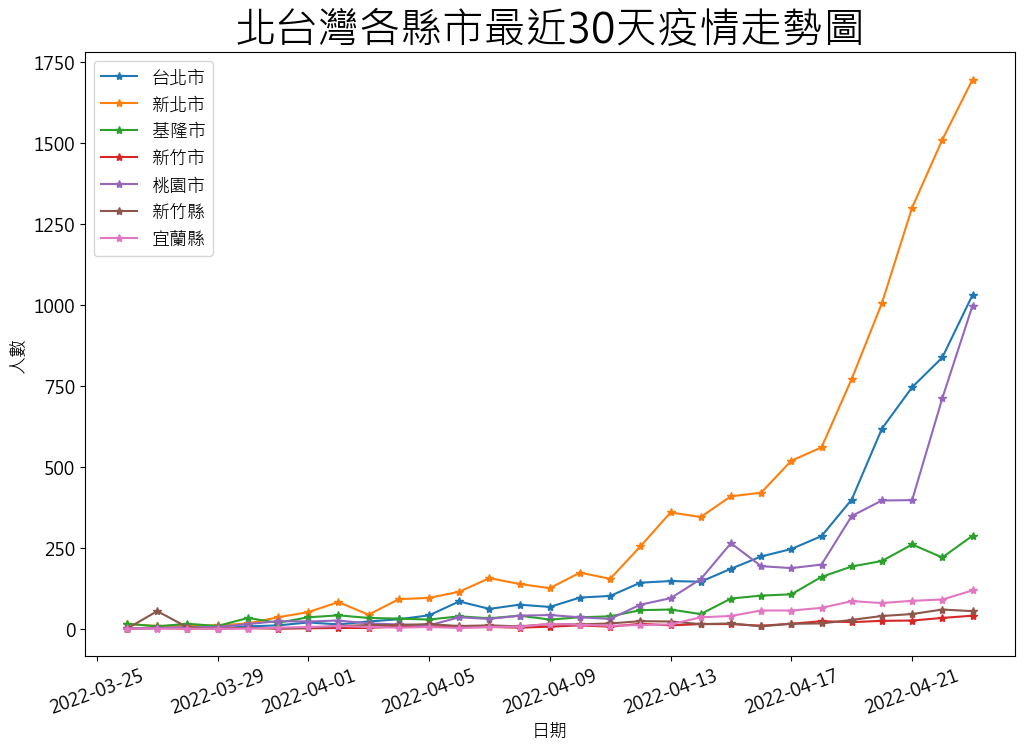

0 : 2022-03-26
0
0
0
0
0
1 : 2022-03-27
0
0
0
0
0
2 : 2022-03-28
0
0
2
0
0
3 : 2022-03-29
0
0
0
0
0
4 : 2022-03-30
0
0
0
0
0
5 : 2022-03-31
2
0
4
0
0
6 : 2022-04-01
2
0
3
0
0
7 : 2022-04-02
3
0
0
0
0
8 : 2022-04-03
1
0
0
0
0
9 : 2022-04-04
4
0
2
0
0
10 : 2022-04-05
2
1
3
0
0
11 : 2022-04-06
4
0
1
0
3
12 : 2022-04-07
4
3
1
0
3
13 : 2022-04-08
7
3
3
0
1
14 : 2022-04-09
7
0
0
2
2
15 : 2022-04-10
9
4
3
0
6
16 : 2022-04-11
21
2
3
1
2
17 : 2022-04-12
26
3
7
1
1
18 : 2022-04-13
26
3
2
2
0
19 : 2022-04-14
31
7
4
2
3
20 : 2022-04-15
37
17
16
4
3
21 : 2022-04-16
24
5
7
3
7
22 : 2022-04-17
40
6
4
7
5
23 : 2022-04-18
50
11
9
2
7
24 : 2022-04-19
70
13
17
15
15
25 : 2022-04-20
136
15
35
10
39
26 : 2022-04-21
178
28
50
10
52
27 : 2022-04-22
187
29
32
22
49
28 : 2022-04-23
150
21
53
11
27
['台中市', '苗栗縣', '彰化縣', '南投縣', '雲林縣']
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [2, 0, 4, 0, 0], [2, 0, 3, 0, 0], [3, 0, 0, 0, 0], [1, 0, 0, 0, 0], [4, 0, 2, 0, 0], [2, 1, 3,

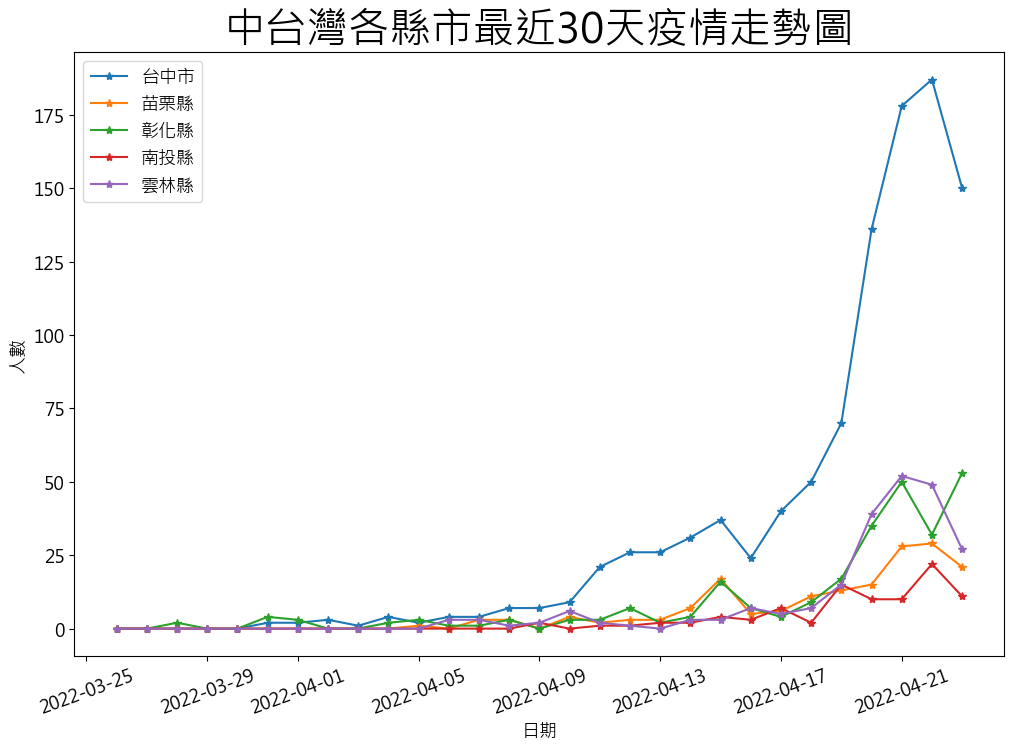

0 : 2022-03-26
1
0
0
0
0
0
1 : 2022-03-27
3
0
0
0
0
0
2 : 2022-03-28
2
0
0
0
0
0
3 : 2022-03-29
3
0
0
0
0
0
4 : 2022-03-30
2
0
0
0
0
0
5 : 2022-03-31
4
0
0
0
0
0
6 : 2022-04-01
6
0
0
0
0
0
7 : 2022-04-02
6
0
0
0
4
0
8 : 2022-04-03
1
0
0
0
1
0
9 : 2022-04-04
5
0
0
0
0
0
10 : 2022-04-05
34
4
0
2
1
0
11 : 2022-04-06
36
5
0
7
4
0
12 : 2022-04-07
50
7
0
1
6
0
13 : 2022-04-08
30
6
2
8
9
0
14 : 2022-04-09
25
17
6
3
22
0
15 : 2022-04-10
30
4
1
6
18
0
16 : 2022-04-11
49
9
0
4
12
0
17 : 2022-04-12
63
11
3
3
19
0
18 : 2022-04-13
45
18
2
1
4
0
19 : 2022-04-14
50
20
2
3
19
0
20 : 2022-04-15
59
32
1
1
14
0
21 : 2022-04-16
41
11
2
1
15
0
22 : 2022-04-17
26
17
0
10
18
1
23 : 2022-04-18
50
41
2
3
16
1
24 : 2022-04-19
106
33
3
0
25
1
25 : 2022-04-20
68
33
6
4
36
0
26 : 2022-04-21
121
62
2
5
20
2
27 : 2022-04-22
95
45
8
7
27
1
28 : 2022-04-23
133
44
18
12
35
1
['高雄市', '台南市', '嘉義市', '嘉義縣', '屏東縣', '澎湖縣']
[[1, 0, 0, 0, 0, 0], [3, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0], [3, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0], [4

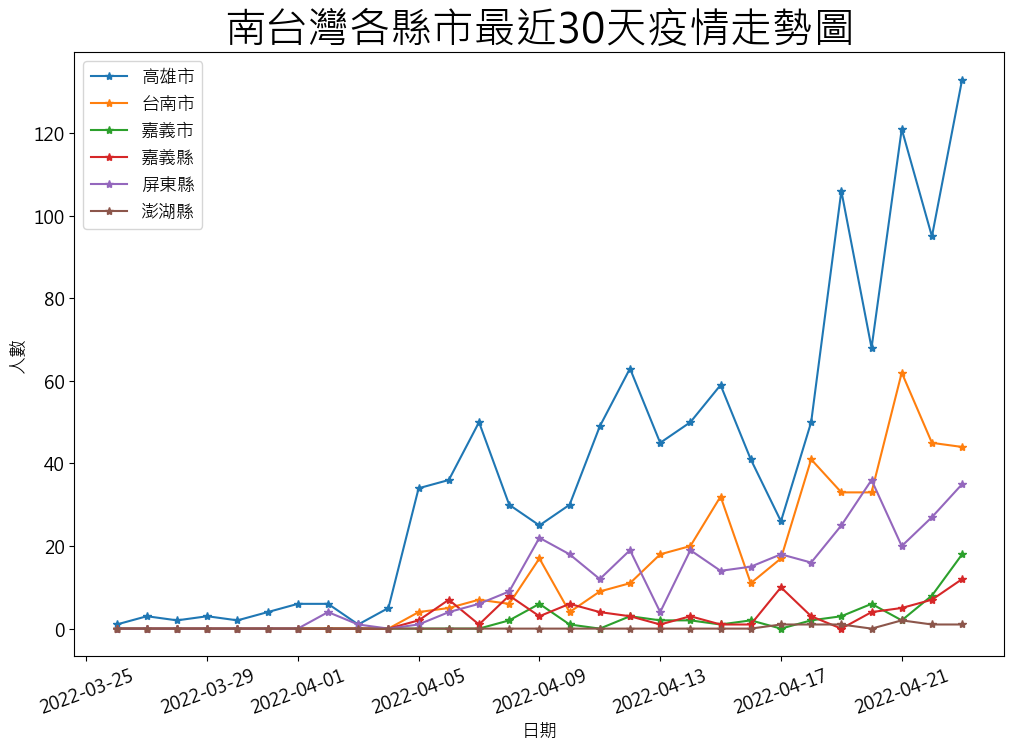

0 : 2022-03-26
0
0
1 : 2022-03-27
0
6
2 : 2022-03-28
0
3
3 : 2022-03-29
0
1
4 : 2022-03-30
0
7
5 : 2022-03-31
4
0
6 : 2022-04-01
4
1
7 : 2022-04-02
2
0
8 : 2022-04-03
2
0
9 : 2022-04-04
11
0
10 : 2022-04-05
5
1
11 : 2022-04-06
19
0
12 : 2022-04-07
25
1
13 : 2022-04-08
20
0
14 : 2022-04-09
13
0
15 : 2022-04-10
24
2
16 : 2022-04-11
28
1
17 : 2022-04-12
44
2
18 : 2022-04-13
54
3
19 : 2022-04-14
142
21
20 : 2022-04-15
56
11
21 : 2022-04-16
120
18
22 : 2022-04-17
57
16
23 : 2022-04-18
73
6
24 : 2022-04-19
88
5
25 : 2022-04-20
92
22
26 : 2022-04-21
102
38
27 : 2022-04-22
130
26
28 : 2022-04-23
172
34
['花蓮縣', '台東縣']
[[0, 0], [0, 6], [0, 3], [0, 1], [0, 7], [4, 0], [4, 1], [2, 0], [2, 0], [11, 0], [5, 1], [19, 0], [25, 1], [20, 0], [13, 0], [24, 2], [28, 1], [44, 2], [54, 3], [142, 21], [56, 11], [120, 18], [57, 16], [73, 6], [88, 5], [92, 22], [102, 38], [130, 26], [172, 34]]
            花蓮縣  台東縣
2022-03-26    0    0
2022-03-27    0    6
2022-03-28    0    3
2022-03-29    0    1
2022-03-30   

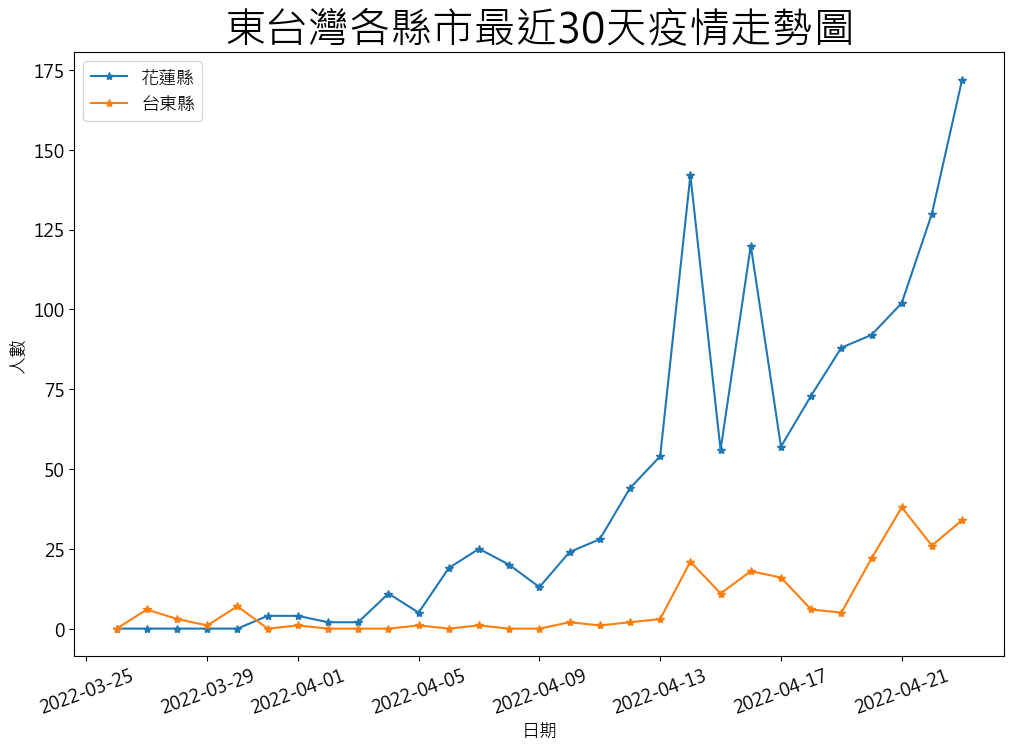

0 : 2022-03-26
0
0
1 : 2022-03-27
0
0
2 : 2022-03-28
0
0
3 : 2022-03-29
0
0
4 : 2022-03-30
0
0
5 : 2022-03-31
1
0
6 : 2022-04-01
1
0
7 : 2022-04-02
0
0
8 : 2022-04-03
1
0
9 : 2022-04-04
0
0
10 : 2022-04-05
0
0
11 : 2022-04-06
1
0
12 : 2022-04-07
0
0
13 : 2022-04-08
0
0
14 : 2022-04-09
0
0
15 : 2022-04-10
0
0
16 : 2022-04-11
0
0
17 : 2022-04-12
0
0
18 : 2022-04-13
1
0
19 : 2022-04-14
0
0
20 : 2022-04-15
0
0
21 : 2022-04-16
0
0
22 : 2022-04-17
0
0
23 : 2022-04-18
0
3
24 : 2022-04-19
0
3
25 : 2022-04-20
0
2
26 : 2022-04-21
5
1
27 : 2022-04-22
2
1
28 : 2022-04-23
4
2
['金門縣', '連江縣']
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [1, 0], [0, 0], [1, 0], [0, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 3], [0, 3], [0, 2], [5, 1], [2, 1], [4, 2]]
            金門縣  連江縣
2022-03-26    0    0
2022-03-27    0    0
2022-03-28    0    0
2022-03-29    0    0
2022-03-30    0    0
2022-03-31    1    0
2022-04-01    1    0
2022-04-02    

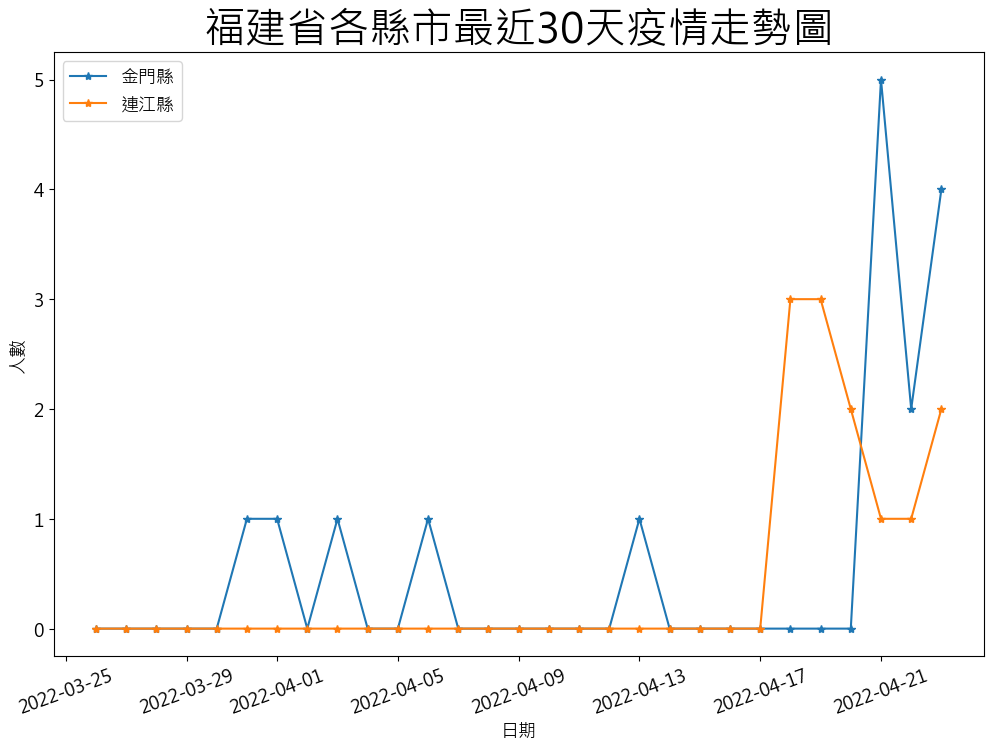

0 : 2022-03-26
0
14
1
0
0
1
1 : 2022-03-27
1
8
2
0
0
3
2 : 2022-03-28
5
10
4
0
0
2
3 : 2022-03-29
1
10
5
0
0
3
4 : 2022-03-30
7
16
14
0
0
2
5 : 2022-03-31
10
35
23
2
0
4
6 : 2022-04-01
19
51
22
2
0
6
7 : 2022-04-02
13
82
25
3
0
6
8 : 2022-04-03
22
43
16
1
0
1
9 : 2022-04-04
29
91
13
4
0
5
10 : 2022-04-05
41
95
10
2
4
34
11 : 2022-04-06
84
114
35
4
5
36
12 : 2022-04-07
61
156
30
4
7
50
13 : 2022-04-08
74
138
40
7
6
30
14 : 2022-04-09
67
125
42
7
17
25
15 : 2022-04-10
96
173
35
9
4
30
16 : 2022-04-11
101
154
30
21
9
49
17 : 2022-04-12
142
254
74
26
11
63
18 : 2022-04-13
147
359
94
26
18
45
19 : 2022-04-14
145
345
153
31
20
50
20 : 2022-04-15
185
409
264
37
32
59
21 : 2022-04-16
223
420
193
24
11
41
22 : 2022-04-17
246
519
187
40
17
26
23 : 2022-04-18
286
560
198
50
41
50
24 : 2022-04-19
399
772
348
70
33
106
25 : 2022-04-20
618
1006
396
136
33
68
26 : 2022-04-21
746
1301
397
178
62
121
27 : 2022-04-22
838
1511
712
187
45
95
28 : 2022-04-23
1031
1697
998
150
44
133
['台北市', '新北市', '桃園市', '

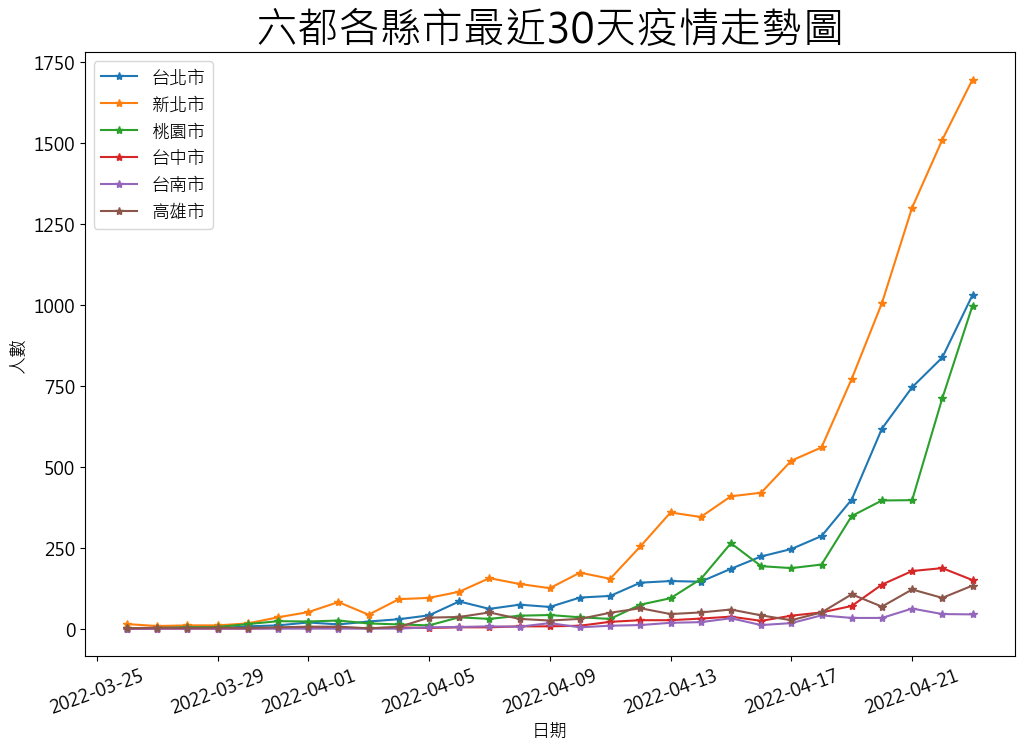

In [10]:
import matplotlib.pyplot as plt

# 只想畫指定的就這樣寫 一次一個
#which_='北台灣'

def Create_plt_df_fn(which_):
    nums_list=[list() for n in range(len(ago_list))]
    for i,ago in enumerate(ago_list):
        city_nums=df.loc[df['個案公佈日']==ago]   # 先搜尋需要的日期縮小範圍
        print(i,':',ago)
        for keys,values in citys_dict_new.items():
            if keys==which_:
                df_columns=values
                df_columns=list(df_columns)
                for v in values:
                    nums=city_nums.loc[city_nums['縣市']==v]    # 再搜尋符合which_字典鍵的值
                    print(len(nums))                            # 並len計算確診數 
                    nums_list[i].append(len(nums))              # 每個日期各縣市確診數為一個list
    print(df_columns)
    print(nums_list)

    # 建立成畫圖用的df
    trends_nums_df=pd.DataFrame(nums_list,columns=df_columns,index=ago_list)
    print(trends_nums_df)

    # 從字串轉成日期格式 以免太多擠在一起
    to_date_index=trends_nums_df.index
    to_date_index=pd.to_datetime(to_date_index)
    Plt_which_fn(which_,to_date_index,trends_nums_df)
    
def Plt_which_fn(which_,to_date_index,trends_nums_df):
    # 顯示中文
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False

    fig=plt.figure(dpi=100,figsize=(12,8))
    for oo in citys_dict_new[which_]:
        plt.plot(to_date_index,trends_nums_df[oo],'-*',label=oo)
    plt.title(which_+'各縣市最近'+str(how_days)+'天疫情走勢圖',fontsize=30)
    plt.xlabel('日期',fontsize=13)
    plt.ylabel('人數',fontsize=13)
    plt.xticks(fontsize=13,rotation=20)
    plt.yticks(fontsize=13)
    plt.legend(loc='best',fontsize=13)
    plt.show()
    
# 用for跑which_可依序一次畫好圖
for K,V in citys_dict_new.items():
    Create_plt_df_fn(K)